In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('perceptron_toydata-truncated.txt', sep= "\t")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      20 non-null     float64
 1   x2      20 non-null     float64
 2   label   20 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


In [4]:
df.describe()

,x1,x2,label
count,20.000000,20.000000,20.000000
mean,0.737500,0.397500,0.500000
std,1.090171,2.546903,0.512989
min,-0.680000,-3.430000,0.000000
25%,-0.157500,-1.920000,0.000000
50%,0.800000,0.950000,0.500000
75%,1.315000,2.605000,1.000000
max,3.880000,3.940000,1.000000


In [5]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

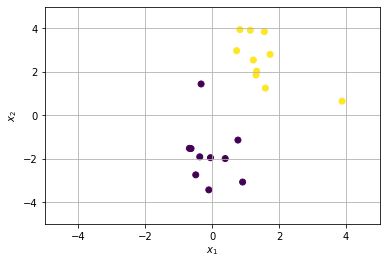

In [7]:
plt.scatter(data = df , x = "x1", y = "x2", c = "label")


plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

In [8]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

In [12]:
ppn = Perceptron(2)

In [13]:
ppn.weights

[0.0, 0.0]

In [14]:
ppn.bias

0.0

In [39]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0
        return prediction

In [40]:
ppn = Perceptron(2)
ppn.forward([1.1, 2.1])
random.seed(123)

In [49]:
class Perceptron:
    def __init__(self, num_features, alpha = 1.):
        self.num_features = num_features
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        self.bias = random.uniform(-0.5, 0.5)
        self.alpha = alpha

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error * self.alpha
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i] * self.alpha

        return error

In [52]:
ppn = Perceptron(2, alpha = 1)
x = [1.1, 2.1]
ppn.update(x, 1)

1

In [53]:
print(f"Model parametres = {ppn.weights},\nModel bias = {ppn.bias}")

Model parametres = [0.8451633525176112, 1.6016705535792228],
Model bias = 0.9362757934152184


In [54]:
    def train(model, all_x, all_y, epochs):
    
        for epoch in range(epochs):
            error_count = 0
    
            for x, y in zip(all_x, all_y):
                error = model.update(x, y)
                error_count += abs(error)
        
            print(f"Ephocs {epoch + 1} errors = {error_count}")
            if error_count == 0:
                return

In [57]:
ppn = Perceptron(num_features = 2, alpha = 0.5)

train(model=ppn, all_x= X_train,all_y= y_train, epochs=10)

Ephocs 1 errors = 4
Ephocs 2 errors = 1
Ephocs 3 errors = 0


In [30]:
def compute_accuracy(model, all_x, all_y):
    correct = 0.
    for x, y in zip(all_x, all_y):
        predict = model.forward(x)
        correct += int(predict == y)

    return correct / len(all_x)

In [31]:
compute_accuracy(ppn, X_train, y_train)

1.0